##### Welcome to (Preceptor) Practice Session 5!

In [1]:
import YData



# Download (Preceptor) Practice Session notebook 5. 
#YData.download_practice_code(5)              # Without answers. 
#YData.download_practice_code(5, True)        # With answers (won't work before Friday eve.)




# Download Data. 
#YData.download_data("data_science_salaries.csv")
#YData.download_data("apple_2024.csv")
#YData.download_data("google_2024.csv")
#YData.download_data("woodard.csv")




# Import Packages/Libraries. 
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline



# 1. Analyzing Two Quantitative Variables via "Pictures"

In [7]:
# Read the data "data_science_salaries.csv" as a Pandas DataFrame. 
salaries_df = pd.read_csv("data_science_salaries.csv")
display(salaries_df.head(2),salaries_df.shape)



,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium


(6599, 11)

In [8]:
# Extract salaries for those who worked On-site. 
# Store your Pandas Series as on_site_salaries.
bool_mask = salaries_df["work_models"] == "On-site"   
on_site_salaries = salaries_df["salary_in_usd"][bool_mask]
display(on_site_salaries.head(3), on_site_salaries.shape)


# Extract salaries for those who did not work On-site. 
# Store your Pandas Series as off_site_salaries. 
off_site_salaries = salaries_df["salary_in_usd"][~bool_mask]
display(off_site_salaries.head(3), off_site_salaries.shape)

4    120000
5     62100
6    250000
Name: salary_in_usd, dtype: int64

(3813,)

0    148100
1     98700
2    140032
Name: salary_in_usd, dtype: int64

(2786,)

### A. Comparing On-site and Off-site Data Science Salaries via Box Plots

##### Now that we have the `on_site_salaries` and `off_site_salaries` Pandas Series, let's use side-by-side boxplots to compare the salaries (in USD).

##### Does it matter if you work on-site or off-site in Data Science jobs? 


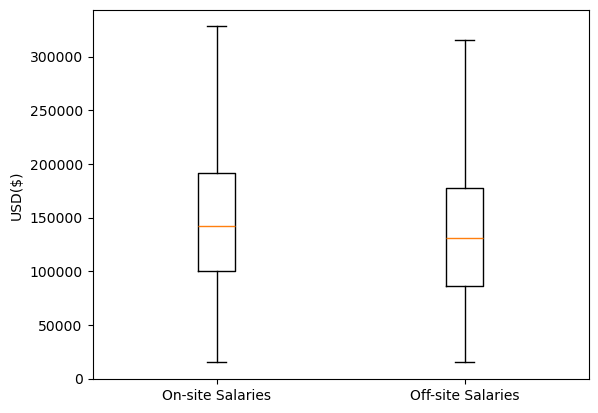

In [9]:
# Plot two box plots side by side such that the boxplot for on_site_salaries 
# is on the left to the boxplot for off_site_salaries. 

plt.boxplot([on_site_salaries, off_site_salaries], labels = ["On-site Salaries", "Off-site Salaries"],
           showfliers = False 
           );
plt.ylabel("USD($)");

### B. Comparing On-site and Off-site Data Science Salaries via Histograms

We can also compare the salaries using overlapping histograms. To do this, it will be useful to set the following properties:

1. `alpha = .5`: Make the histograms have some transparency.
2. `density =  True`: Normalize the histograms to have a area equal to 1 to account for the fact that there are different numbers of on-site salaries and off-site salaries in our two Pandas Series.

Let us try to answer the same question using histograms:
Does it matter if you work-on site or off-site in Data Science jobs?


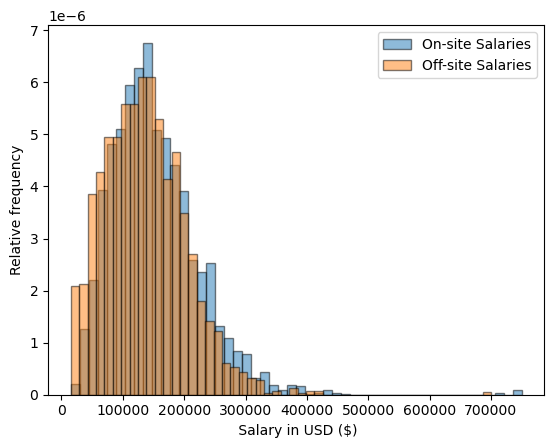

In [10]:
# Plot two overlapping histograms (one for on_site_salaries and the other for off_site_salaries).

plt.hist(on_site_salaries, edgecolor = "k", alpha = .5, label = "On-site Salaries", bins = 50, density= True);
plt.hist(off_site_salaries, edgecolor = "k", alpha = .5, label = "Off-site Salaries", bins = 50, density = True);
plt.legend();
plt.xlabel(" Salary in USD ($)");
plt.ylabel("Relative frequency");

# 2. Analyzing Two Time Series via "Pictures"

### Apple vs Google 
Let us analyse how Apple and Google stocks are doing this year 2024. 
Data Source: <https://www.marketwatch.com>

In [11]:
# Read data as Pandas DataFrame. 
apple_df = pd.read_csv("apple_2024.csv", parse_dates = [0])
google_df = pd.read_csv("google_2024.csv", parse_dates = [0])


In [12]:
# Reset index to Date. 
apple_df = apple_df.set_index("Date")
google_df = google_df.set_index("Date")


In [13]:
display(apple_df.head(3),google_df.head(3))

,Open,High,Low,Close,Volume
Date,,,,,
2024-09-30,230.04,233.00,229.65,233.00,"54,793,391"
2024-09-27,228.46,229.52,227.30,227.79,"34,025,969"
2024-09-26,227.30,228.50,225.41,227.52,"36,636,711"


,Open,High,Low,Close,Volume
Date,,,,,
2024-09-30,163.32,166.15,163.26,165.85,"20,481,301"
2024-09-27,162.81,165.70,162.63,163.95,"21,101,311"
2024-09-26,163.64,164.08,162.28,162.73,"20,319,340"


#### Time Series Plots 

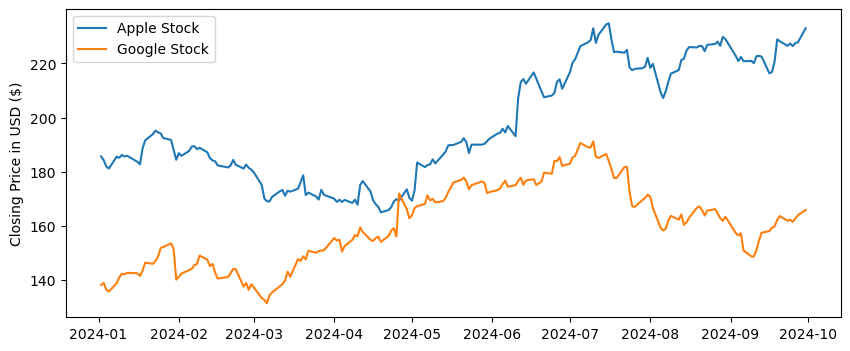

In [14]:
# Plot apple and google closing price time series on the same plot. 
plt.figure(figsize = (10, 4));
plt.plot(apple_df["Close"], label = "Apple Stock");
plt.plot(google_df["Close"], label = "Google Stock");
plt.ylabel("Closing Price in USD ($)");
plt.legend();




# 3. Analyzing Functional Relationship between Two Quantitative Variables via "Pictures"

In [15]:
nc_df = pd.read_csv("woodard.csv", index_col = "ID #")

In [17]:
# Removing outliers from the data. 
bool_cheap = nc_df["Total $"] < 4000000
nc_df = nc_df[bool_cheap]
nc_df.head()

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip
ID #,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604
3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610
4,1983,1152,1.0,0.68,2.0,0,131103,50000,81103,27616
6,1967,1752,1.0,0.29,1.5,1,144452,52000,92452,27604


### A. Is it resonable to assume that as land size increases, property price increases as well?

Let us first check the above functional relationship via a scatter plot. 

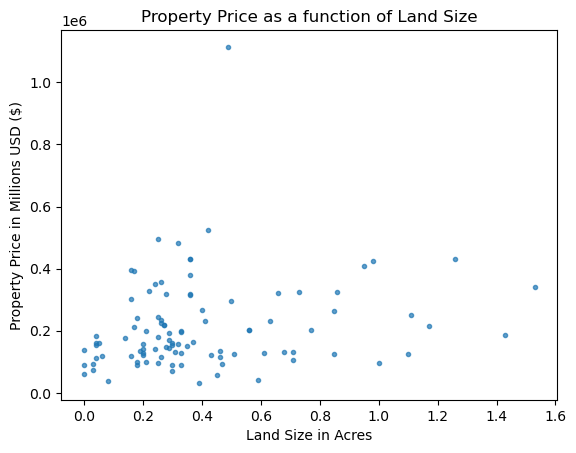

In [18]:
# Create a scatter (dot) plot of total property price as a function of land size. 
plt.plot(nc_df["Acres"], nc_df["Total $"], ".", alpha = 0.7);
plt.xlabel("Land Size in Acres");
plt.ylabel("Property Price in Millions USD ($)");
plt.title("Property Price as a function of Land Size");


##### Let us now construct a scatter plot so that properties with fireplaces are colored green and properties without fireplaces are colored red. 

In [20]:
# Creating a color column. 

# 1. Create a column with all red.
nc_df["fireplace"] = "red" 


# 2. Construct an appropriate boolean mask. 
bool_fire = nc_df["Fireplaces"] >= 1


# 3. Change color for properties that have a fireplace from red to green.
# Hint: # Don't use nc_df[bool_fire]["fireplace"] = "green". Why?
nc_df.loc[bool_fire, "fireplace"] = "green"       


nc_df.head()

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip,fireplace
ID #,,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603,green
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604,green
3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610,red
4,1983,1152,1.0,0.68,2.0,0,131103,50000,81103,27616,red
6,1967,1752,1.0,0.29,1.5,1,144452,52000,92452,27604,green


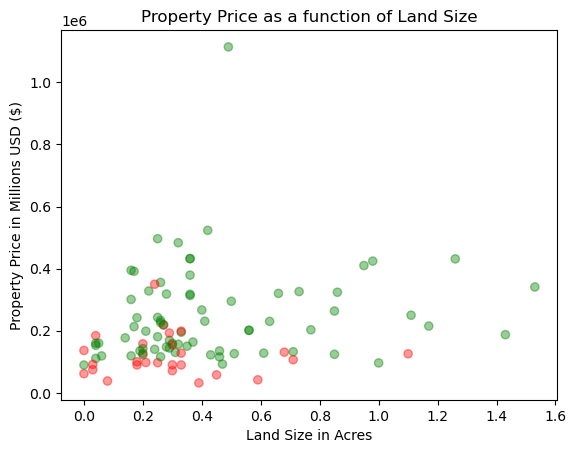

In [21]:
# Let us now construct a scatter plot so that properties with fireplaces are colored green and
# properties without fireplaces are colored red.
# Hint: Use plt.scatter function. 

plt.scatter(nc_df["Acres"], nc_df["Total $"],
            color = nc_df["fireplace"],
            alpha = 0.4
            );
plt.xlabel("Land Size in Acres");
plt.ylabel("Property Price in Millions USD ($)");
plt.title("Property Price as a function of Land Size");


# 4. Subplots 

### A. via plyplot interface

In [22]:
# Recall nc_df DataFrame. 
nc_df.head(3)

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip,fireplace
ID #,,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603,green
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604,green
3,1955,795,1.0,0.30,1.0,0,71666,28000,43666,27610,red


72

27

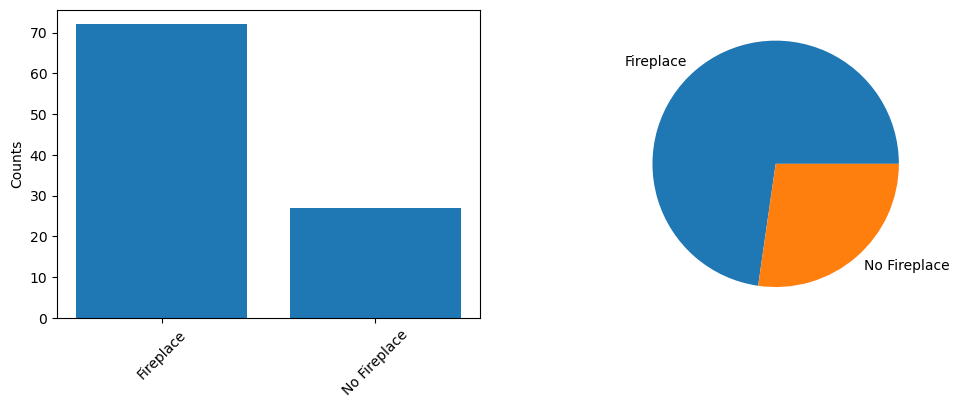

In [24]:
# Let us create a bar graph and a pie chart for the categorical variable Fireplaces. 
# Ensure the two pictures (plots) are side by side. 


# Count the number of properties with fireplaces and store the count as fireplace_count. 
fireplace_count = np.sum(nc_df["Fireplaces"] >= 1) 
# Count the number of properties without fireplaces and stoee the count as no_fireplace_count.
no_fireplace_count = np.sum(nc_df["Fireplaces"] == 0)

display(fireplace_count, no_fireplace_count)


# Change the figure size. (We need a longer canvas than the default one.)
plt.figure(figsize = (12, 4));



# First subplot (Bar Graph).
plt.subplot(1, 2, 1);
plt.bar(["Fireplace", "No Fireplace"], [fireplace_count, no_fireplace_count]); 
plt.xticks(rotation=45);
plt.ylabel("Counts");




# Second subplot (Pie Chart).
plt.subplot(1, 2, 2);
plt.pie([fireplace_count, no_fireplace_count], labels = ["Fireplace", "No Fireplace"]);


### B. via axes interface. 

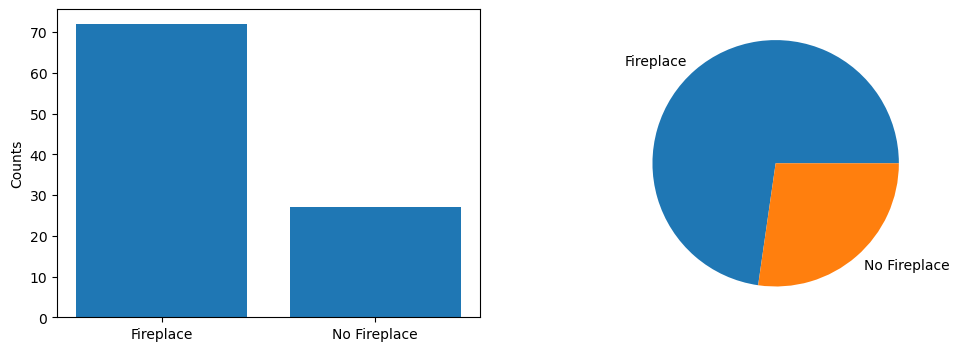

In [25]:
# Using the axes interface.


# Create a skeloton for two subplots. 
fig, ax = plt.subplots(1, 2);


# Set the figure size.
fig.set_size_inches(12, 4);

    
# First subplot (Pie Chart).
ax[0].bar(["Fireplace", "No Fireplace"], [fireplace_count, no_fireplace_count]); 
ax[0].set_ylabel("Counts");


# Second subplot (Pie Chart). 
ax[1].pie([fireplace_count, no_fireplace_count], labels = ["Fireplace", "No Fireplace"]);


# 5. Seaborn

In [26]:
import seaborn as sns   

###  Let us first create some of the pictures above using the Seaborn! 

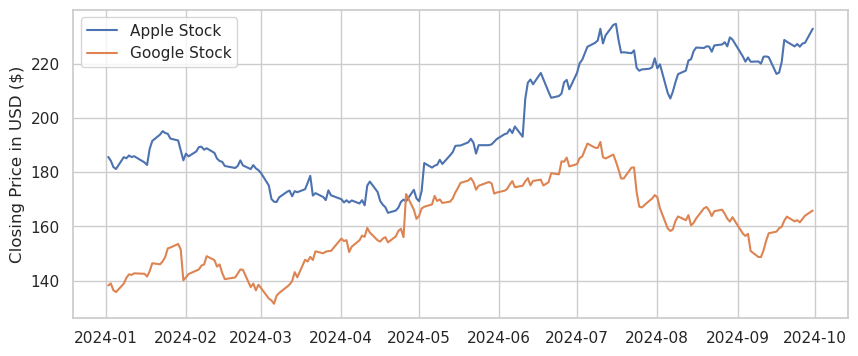

In [27]:
# Apple vs Google using Seaborn. 

# Apply Seaborn's effects. Use the function sns.set_theme(style = "whitegrid").
sns.set_theme(style = "whitegrid")


# Copy and paste rest of the code from above. 
plt.figure(figsize = (10, 4));
plt.plot(apple_df["Close"], label = "Apple Stock");
plt.plot(google_df["Close"], label = "Google Stock");
plt.ylabel("Closing Price in USD ($)")
plt.legend();




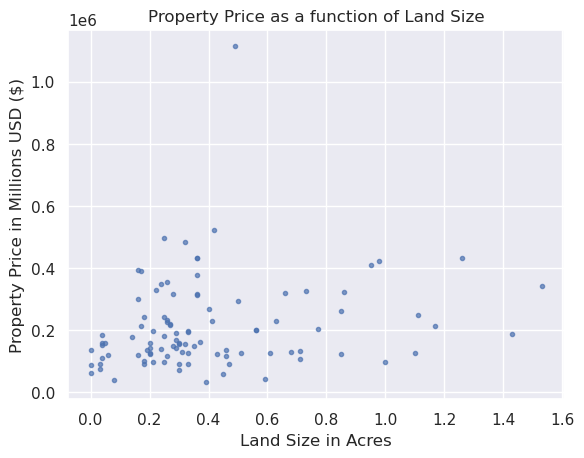

In [28]:
# Using seaborn's default theme. 
sns.set_theme()


# Copy and paste rest of the code from above. 
plt.plot(nc_df["Acres"], nc_df["Total $"], ".", alpha = 0.7);
plt.xlabel("Land Size in Acres");
plt.ylabel("Property Price in Millions USD ($)");
plt.title("Property Price as a function of Land Size");


## The `sns.relplot()` function 

Analyzing two Quantitative variables via sns.relplot () function. 

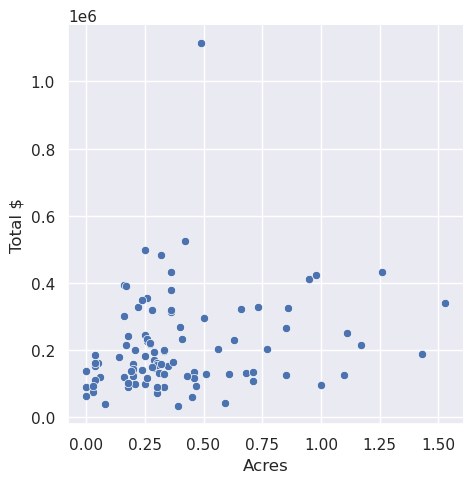

In [29]:
# Using relplot function in Seaborn package to recreate the above plot. 

sns.relplot(data = nc_df, x = "Acres", y = "Total $");   # Which syntax is easier? No need to give separate lables.

#### Let us now use `sns.relplot()` function to create some more exotic plots. 



Let's continue to explore the relplot using data on North Carolina property prices. 

We will also look at mapping other features of our data onto visual properties including: 
- `x`, and `y` column names to be plotted (as we have done before)
- `hue`: The column name to be mapped to the color of the points
- `size`: The column name to be mapped to the size of points
- `style`: The column name to be mapped to the style of the markers
- `col`: fThe column name to be mapped to faceting to compare multiple subplots


In [30]:
nc_df.head(2)

,Year Built,Sq. Ft.,Story,Acres,No. Baths,Fireplaces,Total $,Land $,Building $,Zip,fireplace
ID #,,,,,,,,,,,
1,1990,2102,1.0,0.77,NaN,1,203200,44000,159200,27603,green
2,1986,1740,1.5,0.06,3.0,1,119096,22000,97096,27604,green


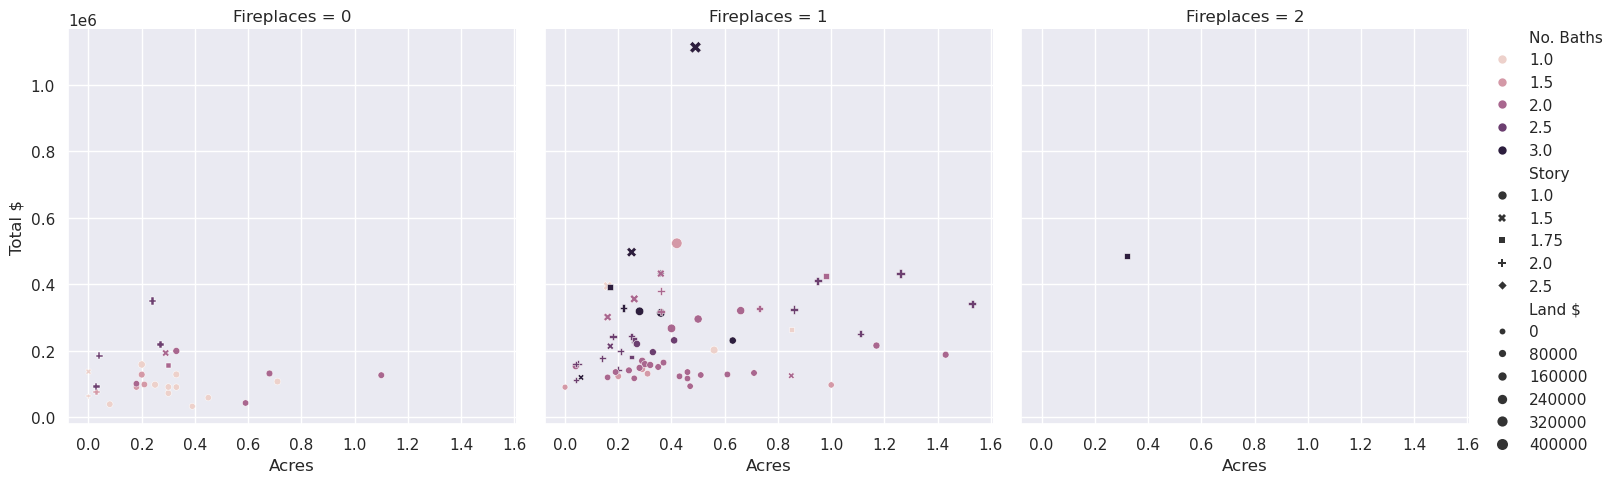

In [29]:
# Plot Total cost as a function of Acres. 
# Also try to add more visual features to your plot using "hue", "size", "style", and "col" within 
# the argument of sns.relplot() function. 
# There is no unique correct answer for this problen. Goal is to produce good informative plots. 

sns.relplot(data = nc_df, x = "Acres", y = "Total $", col = "Fireplaces", size = "Land $",
            hue = "No. Baths", style = "Story" );

## The `sns.displot()` function. 

Analyzing one Quantitative variable via sns.displot() function. 

### Plotting a single quantitative variable

We can plot a single quantitative variables using the `sns.displot()` function.

Properties we can set include
- `x`: The name of the data column you want to plot
- `hue`: The name of the column that colors each point
- `kind` The type of plot

Different options for `kind` are: “hist”, “kde”, “ecdf”


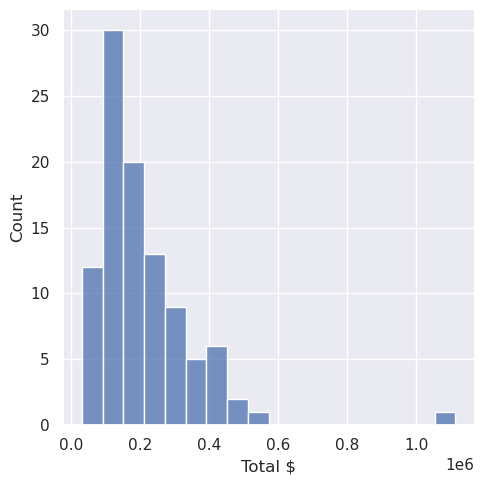

In [31]:
# Plot a Histogram for total property price "Total $" using sns.displot() function. 
sns.displot(data = nc_df, 
            x="Total $",
            #hue = "No. Baths",
            kind="hist");            

# Easier than using plt.hist() function? 
# One can easily add more features to the Histogram below using sns.displot() then using plt.hist(). 

## The `sns.catplot()` function

Analyzing one Quantitative variable with respect one or more categorical variables. 

### Plotting a quantitative variable for different categorical variable levels

We can plot a quantitative variable for different categorical variable levels using the `sns.catplot()` function.

We specify: 
- `x`: Cateogoral x-value column name
- `y`: Quantitative y-value column name
- `kind`: The type of plot

The `kind` argument can be set to the following: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, “bar”, or “count”


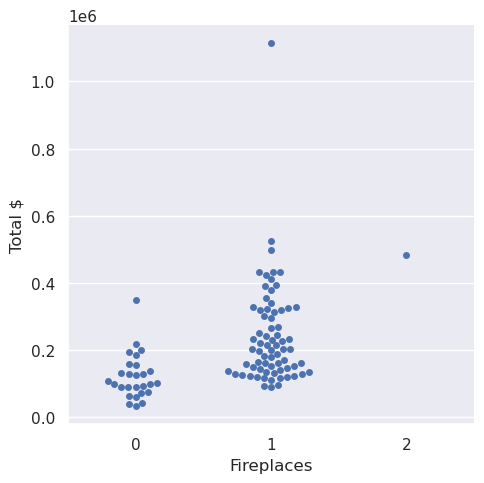

In [33]:
# Plot Total property price as the function of number of fireplaces using different kinds of plots.
# Choose from: “strip”, “swarm”, “box”, “violin”, “boxen”, “point”, or “bar”.
sns.catplot(data = nc_df, 
            x = "Fireplaces", 
            y = "Total $", 
            kind = "swarm");

